In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 500x900 with 0 Axes>

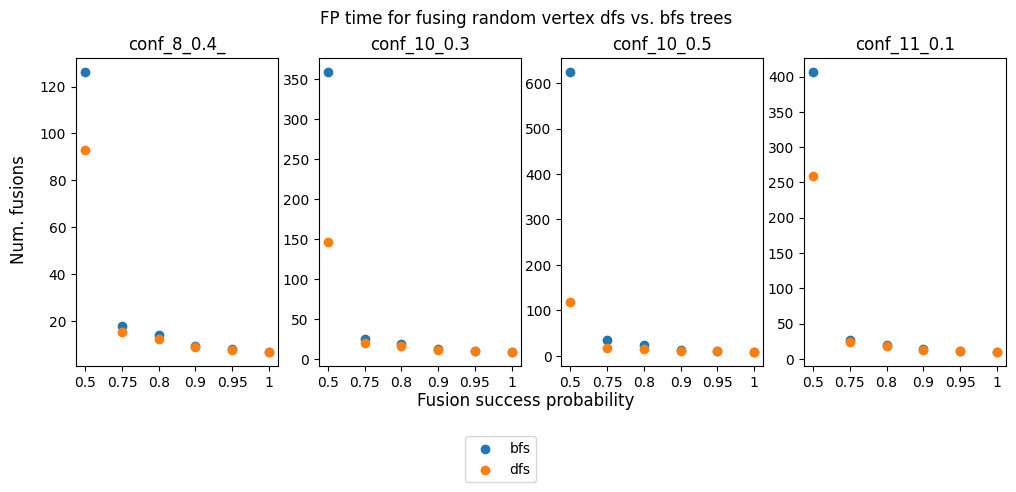

<Figure size 500x900 with 0 Axes>

In [108]:
df = pd.read_csv('../evaluation/bfs-vs-dfs.csv')
df.set_index('Unnamed: 0', inplace=True)
success_probabilities = ['0.5', '0.75', '0.8', '0.9','0.95','1'] #0.1 omitted
configurations = [['conf_8_0.4_type_bfs','conf_8_0.4_type_dfs'],['conf_10_0.3_type_bfs','conf_10_0.3_type_dfs'],['conf_10_0.5_type_bfs','conf_10_0.5_type_dfs'],['conf_11_0.1_type_bfs','conf_11_0.1_type_dfs']] #'conf_8_0.4_type_bfs','conf_8_0.4_type_dfs', 'conf_10_0.3_type_bfs','conf_10_0.3_type_dfs', 'conf_11_0.1_type_bfs','conf_11_0.1_type_dfs'
fig, axs = plt.subplots(1,4, figsize=(12,4))
for idx, configuration in enumerate(configurations):
    for search_type in configuration:
        first_passage_times = []
        for prob in success_probabilities:
            entries = [df[prob][search_type+'_sample_'+str(i)] for i in range(0,5)]
            first_passage_times.append(sum(entries)/len(entries))


    #     first_passage_times = [df[prob][row] for prob in success_probabilities]
        plot = axs[idx].scatter(success_probabilities,first_passage_times, label=search_type[-3:])
        axs[idx].set_title(search_type[:11])


fig.supxlabel('Fusion success probability',y=0)
fig.supylabel('Num. fusions',x=0.07)
fig.suptitle('FP time for fusing random vertex dfs vs. bfs trees',y=1)
plt.legend(bbox_to_anchor=(-1.5, -0.4), loc = 'lower center')
plt.figure(figsize=(5,9)) 

Group: 3
Group: 4
Group: 5
Group: 6
Group: 8
Group: 9
Group: 10


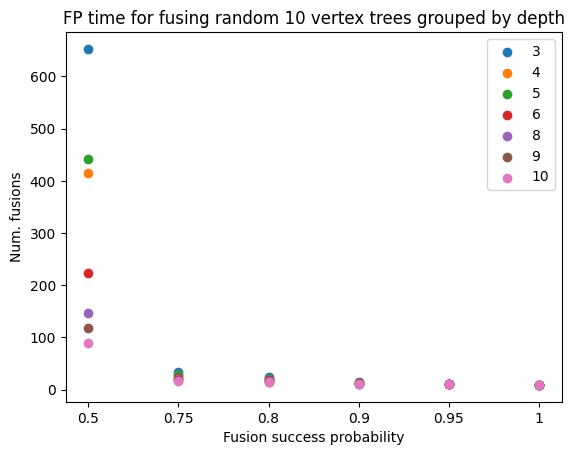

In [91]:
#group by degree, or depth 
#plot average of all group 4 configs, average of all plot 5 configs...
filtered_df = df[df.index.str.contains('conf_10', case=False, na=False)].groupby('depth')
# filtered_df = df.groupby('depth')

for group_name, group_data in filtered_df:
    print(f"Group: {group_name}")
    first_passage_times = []
    for prob in success_probabilities:
        entries = [group_data[prob][configuration] for configuration in group_data.index]
        first_passage_times.append(sum(entries)/len(entries))
    plot = plt.scatter(success_probabilities,first_passage_times, label=group_name)

plt.xlabel('Fusion success probability')
plt.ylabel('Num. fusions')
ax = plt.gca()
ax.set_title('FP time for fusing random 10 vertex trees grouped by depth')
plt.legend()

Group: 2
Group: 3
Group: 4
Group: 5
Group: 6
Group: 7


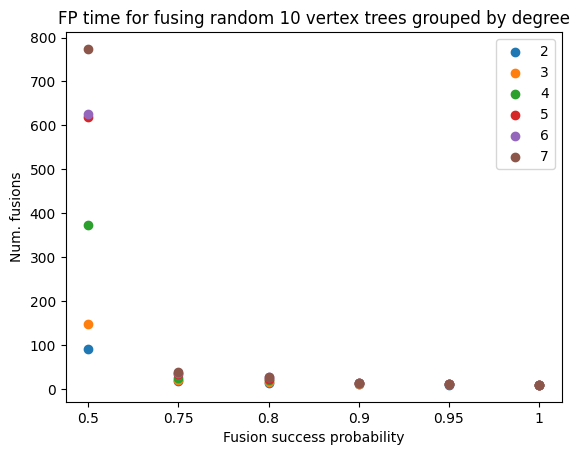

In [58]:
filtered_df = df[df.index.str.contains('conf_10', case=False, na=False)].groupby('max_degree')
# filtered_df = df.groupby('outer_loops')

for group_name, group_data in filtered_df:
    print(f"Group: {group_name}")
    first_passage_times = []
    for prob in success_probabilities:
        entries = [group_data[prob][configuration] for configuration in group_data.index]
        first_passage_times.append(sum(entries)/len(entries))
    plot = plt.scatter(success_probabilities,first_passage_times, label=group_name)

plt.xlabel('Fusion success probability')
plt.ylabel('Num. fusions')
ax = plt.gca()
ax.set_title('FP time for fusing random 10 vertex trees grouped by degree')
plt.legend()

<Figure size 500x900 with 0 Axes>

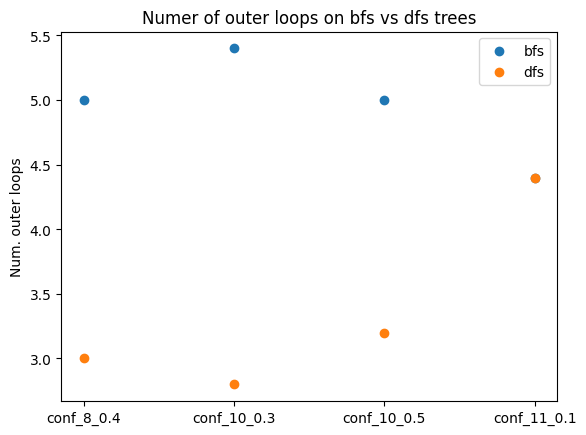

<Figure size 500x900 with 0 Axes>

In [118]:
configurations = [['conf_8_0.4_type_bfs','conf_8_0.4_type_dfs'],['conf_10_0.3_type_bfs','conf_10_0.3_type_dfs'],['conf_10_0.5_type_bfs','conf_10_0.5_type_dfs'],['conf_11_0.1_type_bfs','conf_11_0.1_type_dfs']]
points = [[],[]]
for idx, configuration in enumerate(configurations):
    for idx2, search_type in enumerate(configuration):
        filtered_df = df[df.index.str.contains(search_type, case=False, na=False)]
        points[idx2].append(filtered_df['best_dfs_outer_loops'].sum()/len(filtered_df['best_dfs_outer_loops']))

plot = plt.scatter(['conf_8_0.4','conf_10_0.3','conf_10_0.5','conf_11_0.1'],points[0], label='bfs')
plot = plt.scatter(['conf_8_0.4','conf_10_0.3','conf_10_0.5','conf_11_0.1'],points[1], label='dfs')
# plt.set_title(search_type[:11])


plt.ylabel('Num. outer loops')
ax = plt.gca()
ax.set_title('Numer of outer loops on bfs vs dfs trees')
plt.legend()
plt.figure(figsize=(5,9)) 

Group: 3
Group: 4
Group: 5
Group: 6
Group: 7
Group: 2
Group: 3
Group: 4


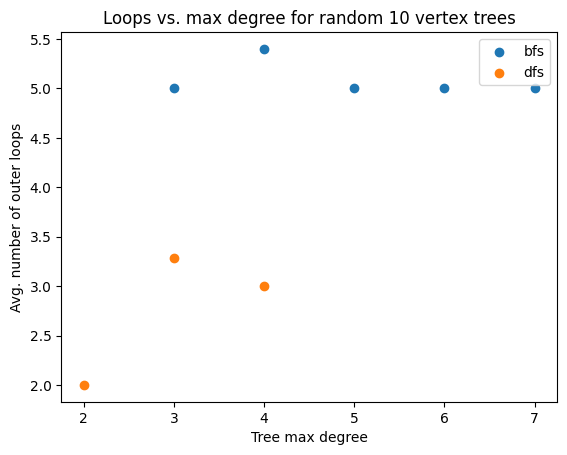

In [51]:
# need to compare optimal tree vs any tree? 
# i.e.: same tree but different fusion order? for instance lets take the worst fusion order. Worst fusion order has exactly the same FP times.
# Then compare what determines good outer loops: max_degree vs. averaged outer_loops
filtered_df = df[df.index.str.contains('conf_10_0.*_type_bfs', case=False, na=False)].groupby('max_degree')
degree_list = []

for group_name, group_data in filtered_df:
    print(f"Group: {group_name}")
    entries = [group_data['best_dfs_outer_loops'][configuration] for configuration in group_data.index]
    degree_list.append(sum(entries)/len(entries))

plot = plt.scatter(filtered_df.groups.keys(),degree_list, label='bfs')

filtered_df = df[df.index.str.contains('conf_10_0.*_type_dfs', case=False, na=False)].groupby('max_degree')
degree_list = []

for group_name, group_data in filtered_df:
    print(f"Group: {group_name}")
    entries = [group_data['best_dfs_outer_loops'][configuration] for configuration in group_data.index]
    degree_list.append(sum(entries)/len(entries))

plot = plt.scatter(filtered_df.groups.keys(),degree_list, label='dfs')

plt.xlabel('Tree max degree')
plt.ylabel('Avg. number of outer loops')
ax = plt.gca()
ax.set_title('Loops vs. max degree for random 10 vertex trees')
plt.legend()

Group: 3
Group: 4
Group: 5
Group: 6
Group: 8
Group: 9
Group: 10


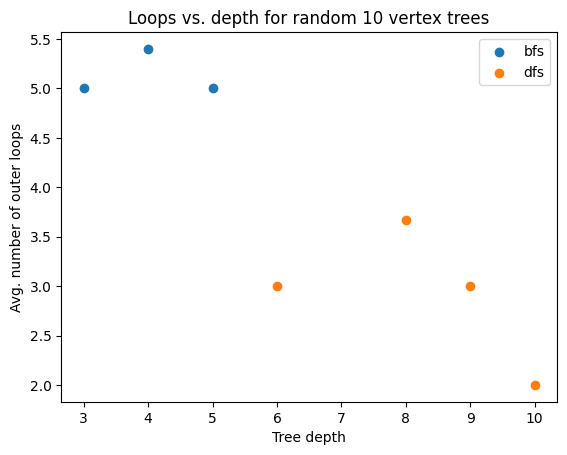

In [52]:
filtered_df = df[df.index.str.contains('conf_10_0.*_type_bfs', case=False, na=False)].groupby('depth')
degree_list = []

for group_name, group_data in filtered_df:
    print(f"Group: {group_name}")
    entries = [group_data['best_dfs_outer_loops'][configuration] for configuration in group_data.index]
    degree_list.append(sum(entries)/len(entries))

plot = plt.scatter(filtered_df.groups.keys(),degree_list, label='bfs')

filtered_df = df[df.index.str.contains('conf_10_0.*_type_dfs', case=False, na=False)].groupby('depth')
degree_list = []

for group_name, group_data in filtered_df:
    print(f"Group: {group_name}")
    entries = [group_data['best_dfs_outer_loops'][configuration] for configuration in group_data.index]
    degree_list.append(sum(entries)/len(entries))

plot = plt.scatter(filtered_df.groups.keys(),degree_list, label='dfs')

ax = plt.gca()
ax.set_title('Loops vs. depth for random 10 vertex trees')
plt.xlabel('Tree depth')
plt.ylabel('Avg. number of outer loops')
plt.legend()